In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

import sys
sys.path.append("../../")

# Package for importing image representation
from PIL import Image, ImageOps

# from src.V1_reconst import generate_Y, reconstruct
import pandas as pd
import seaborn as sns
import time
import os.path
from src.compress_sensing_library import *
from src.utility_library import *
from src.figure_library import *

# Setup

In [2]:
img = 'tree_part1.jpg'
img_nm = img.split('.')[0]
root = search_root()
method = 'dwt'
V1_file = 'param_db2_Mon_Apr_24_13_52_32_2023.csv'
pixel_file = 'param_db2_Mon_Apr_24_12_36_36_2023.csv'
gau_file = 'param_db2_Mon_Apr_24_12_37_23_2023.csv'

data = process_result_data(img, 'dwt', pixel_file, gau_file, V1_file)

# load_V1 = '{root}/result/dct/{img}/V1/color_param_Wed_May_31_12_55_18_2023.csv'.format(root = root, img = img_nm)
# load_pixel = '{root}/result/dct/{img}/pixel/color_param_Mon_May_15_04_26_35_2023.csv'.format(root = root, img = img_nm)
# load_gaussian = '{root}/result/dct/{img}/gaussian/color_param_Mon_May_15_05_30_24_2023.csv'.format(root = root, img = img_nm)
# directory = "num_cell_error"

# save = True
# data = [load_pixel, load_gaussian, load_V1]


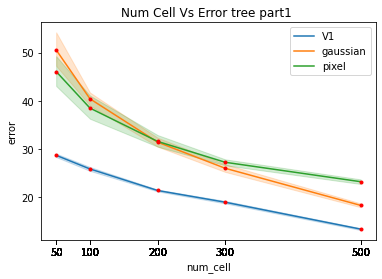

In [5]:
data = process_result_data(img, method, pixel_file, gau_file, V1_file)
plt.xticks(data['V1'][0]['num_cell'])
plt.xlabel('num_cell')
title = "Num_Cell_Vs_Error_{img}_".format(img = img_nm)
plt.title(title.replace('_', ' '))


for obs, plot in data.items():
    sns.lineplot(data = plot[0], x = 'num_cell', y = 'error', palette='Accent', label = obs)
    plt.plot(plot[1]['num_cell'], plot[1]['mean_err'], 'r.')
plt.legend(loc = 'best')
plt.show()

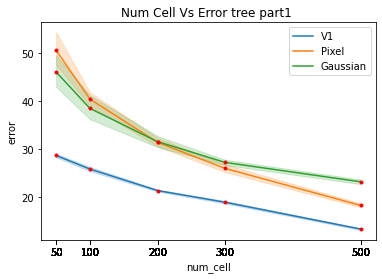

In [3]:
num_cell_error_figure(img, method, pixel_file, gau_file, V1_file)

In [14]:
data['gaussian'][1]

,num_cell,alp,lv,mean_err
5,50,0.01,4,50.579626
29,100,0.10,4,40.412310
50,200,0.10,4,31.397698
71,300,0.10,4,25.964787
92,500,0.10,4,18.258170


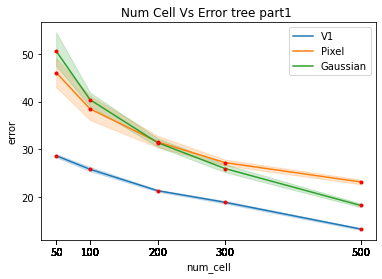

In [9]:

sns.lineplot(data = data['V1'][0], x = 'num_cell', y = 'error', palette='Accent', legend = False)
sns.lineplot(data = data['pixel'][0], x = 'num_cell', y = 'error', palette='Accent', legend = False)
sns.lineplot(data = data['gaussian'][0], x = 'num_cell', y = 'error', palette='Accent', legend = False)
# plt.yscale('log')
plt.xticks(data['V1'][0]['num_cell'])
plt.plot(data['V1'][1]['num_cell'], data['V1'][1]['mean_err'], 'r.') # for V1 numcell location
plt.plot(data['pixel'][1]['num_cell'].unique(), data['pixel'][1]['mean_err'], 'r.') #For pixel samp location
plt.plot(data['gaussian'][1]['num_cell'].unique(), data['gaussian'][1]['mean_err'], 'r.')
plt.xlabel('num_cell')
title = "Num_Cell_Vs_Error_{img}_".format(img = img_nm)
plt.title(title.replace('_', ' '))
plt.legend(['V1', 'Pixel', 'Gaussian'], loc = 'best')
plt.show()

# fig_path = fig_save_path('tree_part1', 'dwt', 'combined', 'NumCell_Error_' + "_".join(
#     str.split(time.ctime().replace(":", "_"))))
# plt.savefig(fig_path, dpi = 200)

## Process V1 data

In [10]:
V1_param_df = pd.read_csv(load_V1)

for index in V1_param_df.columns:
    if (index == 'Unnamed: 0') :
        V1_param_df.drop('Unnamed: 0', axis = 1, inplace=True)

In [11]:
V1_param_mean_df = V1_param_df.groupby(
    ['num_cell', 'sparse_freq', 'cell_size', 'alp'], as_index=False).mean().drop('rep', axis=1) 

V1_param_min_df = V1_param_mean_df.sort_values('error').drop_duplicates('num_cell')
V1_param_min_df = V1_param_min_df.rename(columns={'error': 'min_error'})
V1_merged_df = pd.merge(V1_param_df, V1_param_min_df, 
                               on=['num_cell', 'sparse_freq', 'cell_size', 'alp'], how='left')
V1_plotting_data = V1_merged_df.loc[V1_merged_df['min_error'].notnull()]

In [39]:
#V1 Data processing
V1_min_mean_err_df = pd.DataFrame()
for i in V1_param_mean_df['num_cell'].unique():
    V1_temp = V1_param_mean_df.loc[V1_param_mean_df['num_cell'] == i]
    #hyperparameter for each number of cell
    ## Grabbing values by each values
    V1_min_mean_err_df = V1_min_mean_err_df.append(V1_temp.loc[V1_temp['error'] == V1_temp['error'].min()])
    
# Merge two data to extract
V1_min_mean_err_df = V1_min_mean_err_df.rename(columns={'error' : 'mean_err'})
V1_merged_df = pd.merge(V1_param_df, V1_min_mean_err_df, on = ['num_cell', 'sparse_freq', 'cell_size', 'alp'], how = 'left')
V1_plotting_data = V1_merged_df.loc[V1_merged_df['mean_err'].notnull()]


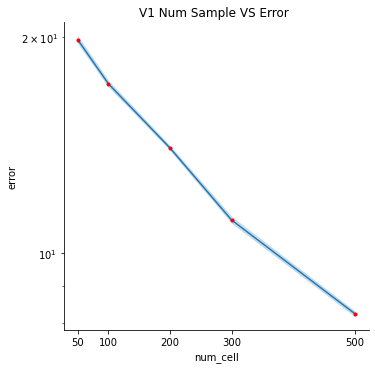

In [40]:
V1_fig = sns.relplot(data = V1_plotting_data, x = 'num_cell', y = 'error', kind= 'line')
V1_fig.set(yscale='log')
plt.plot(V1_param_min_df['num_cell'].unique(), V1_param_min_df['min_error'], 'r.')
title = 'V1_Num_Sample_VS_Error_'
plt.title(title.replace('_', ' '))
plt.xticks(V1_param_df['num_cell'].unique())


# Saving
if (save):
    fig_path = fig_save_path(img_nm, 'dct', '{directory}/V1'.format(directory = directory), title + "_".join(
        str.split(time.ctime().replace(":", "_"))))
    plt.savefig(fig_path, dpi = 200)

plt.show()

## Process pixel Data

In [19]:
pixel_param_df = pd.read_csv(load_pixel)
for index in pixel_param_df.columns:
    if (index == 'Unnamed: 0') :
        pixel_param_df.drop('Unnamed: 0', axis = 1, inplace=True)

In [20]:
pixel_param_mean_df = pixel_param_df.groupby(
    ['alp', 'num_cell'], as_index=False).mean().drop('rep', axis=1) 

pixel_param_min_df = pixel_param_mean_df.sort_values('error').drop_duplicates('num_cell')
pixel_param_min_df = pixel_param_min_df.rename(columns={'error': 'min_error'})
pixel_merged_df = pd.merge(pixel_param_df, pixel_param_min_df, 
                               on=['alp', 'num_cell'], how='left')
pixel_plotting_data = pixel_merged_df.loc[pixel_merged_df['min_error'].notnull()]

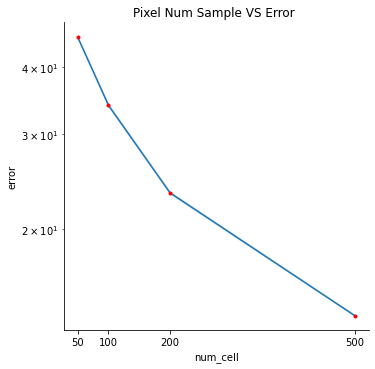

'/home/bans/Documents/research/figures/dct/peppers/num_cell_error/pixel/Pixel_Num_Sample_VS_Error_Mon_May_15_12_33_00_2023.png'

In [26]:
pixel_fig = sns.relplot(data = pixel_plotting_data, x = 'num_cell', y = 'error', kind= 'line')
pixel_fig.set(yscale='log')
plt.plot(pixel_param_min_df['num_cell'].unique(), pixel_param_min_df['min_error'], 'r.')
title = 'Pixel_Num_Sample_VS_Error_'
plt.title(title.replace('_', ' '))
plt.xticks(pixel_param_df['num_cell'].unique())

if (save):
    fig_path = fig_save_path(img_nm, 'dct', '{directory}/pixel'.format(directory = directory), title + "_".join(
        str.split(time.ctime().replace(":", "_"))))
    pixel_fig.savefig(fig_path, dpi = 200)
    
plt.show()
fig_path

## Load gaussian

In [27]:
gaussian_param_df = pd.read_csv(load_gaussian)
for index in gaussian_param_df.columns:
    if (index == 'Unnamed: 0') :
        gaussian_param_df.drop('Unnamed: 0', axis = 1, inplace=True)

In [28]:
gaussian_param_mean_df = gaussian_param_df.groupby(
    ['alp', 'num_cell'], as_index=False).mean().drop('rep', axis=1) 

gaussian_param_min_df = gaussian_param_mean_df.sort_values('error').drop_duplicates('num_cell')
gaussian_param_min_df = gaussian_param_min_df.rename(columns={'error': 'min_error'})
gaussian_merged_df = pd.merge(gaussian_param_df, gaussian_param_min_df, 
                               on=['alp', 'num_cell'], how='left')
gaussian_plotting_data = gaussian_merged_df.loc[gaussian_merged_df['min_error'].notnull()]

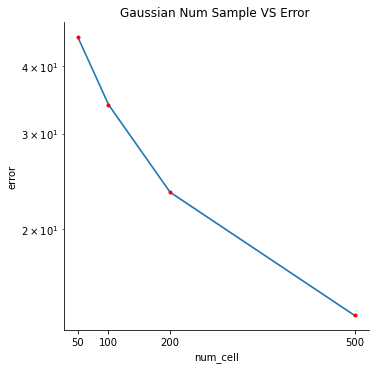

In [29]:
gaussian_fig = sns.relplot(data = gaussian_plotting_data, x = 'num_cell', y = 'error', kind= 'line')
gaussian_fig.set(yscale='log')
plt.plot(gaussian_param_min_df['num_cell'].unique(), gaussian_param_min_df['min_error'], 'r.')
title = 'Gaussian_Num_Sample_VS_Error_'
plt.title(title.replace('_', ' '))
plt.xticks(gaussian_param_df['num_cell'].unique())

if (save):
    fig_path = fig_save_path(img_nm, 'dct', '{directory}/gaussian'.format(directory = directory), title + "_".join(
        str.split(time.ctime().replace(":", "_"))))
    plt.savefig(fig_path, dpi = 200)

plt.show()

# for saving


## V1 Vs Pixel Vs Gaussian

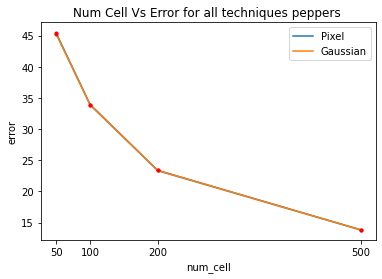

In [34]:
# V1_err = sns.lineplot(data = V1_plotting_data, x = 'num_cell', y = 'error', palette='Accent', legend = False)
pixel_err = sns.lineplot(data = pixel_plotting_data, x = 'num_cell', y = 'error')
gaussian_err = sns.lineplot(data = gaussian_plotting_data, x = 'num_cell', y = 'error')
# plt.yscale('log')
# plt.xticks(V1_param_min_df['num_cell'])
plt.xticks(pixel_param_min_df['num_cell'])
# plt.plot(V1_param_min_df['num_cell'], V1_param_min_df['min_error'], 'r.') # for V1 numcell location
plt.plot(pixel_param_min_df['num_cell'].unique(), pixel_param_min_df['min_error'], 'r.') #For pixel samp location
plt.plot(gaussian_param_min_df['num_cell'].unique(), gaussian_param_min_df['min_error'], 'r.')
plt.xlabel('num_cell')
title = "Num_Cell_Vs_Error_for_all_techniques_{img}_".format(img = img_nm)
plt.title(title.replace('_', ' '))
plt.legend(['Pixel', 'Gaussian'], loc = 'best')


if (save):
    fig_path = fig_save_path(img_nm, 'dct', '{directory}/combined'.format(directory = directory), 'NumCell_Error_' + "_".join(
        str.split(time.ctime().replace(":", "_"))))
    plt.savefig(fig_path, dpi = 200)
plt.show()

In [3]:
plotting_dict ={}

for load_data in data:
    if (load_data != "-n"):
        param_df = pd.read_csv(load_data)
        for index in param_df.columns:
            if (index == 'Unnamed: 0') :
                param_df.drop('Unnamed: 0', axis = 1, inplace=True)
        if (load_data.split("_")[1].lower() != 'v1'):
            param_mean_df = param_df.groupby(
                ['alp', 'num_cell'], as_index=False).mean().drop('rep', axis=1) 

            param_min_df = param_mean_df.sort_values('error').drop_duplicates('num_cell')
            param_min_df = param_min_df.rename(columns={'error': 'min_error'})
            merged_df = pd.merge(param_df, param_min_df, 
                                           on=['alp', 'num_cell'], how='left')
            plotting_data = merged_df.loc[merged_df['min_error'].notnull()]
            
            